In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

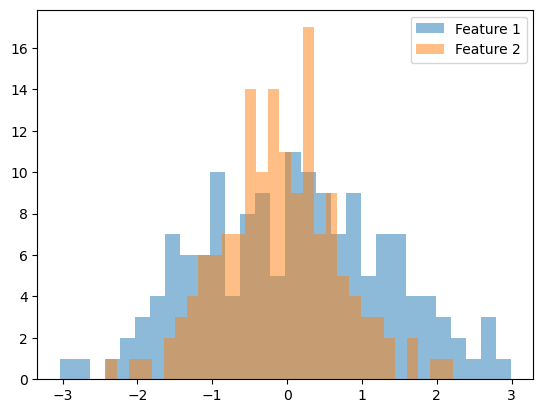

In [3]:
# Reproducibility seed
np.random.seed(123)

# Generate some data

'''
The code above generates a 2D array of random points Z0 with 150 points and 2 features.
The first feature is generated from a normal distribution with a mean of 0 and a standard deviation of 1.25.
The second feature is generated from a normal distribution with a mean of 0 and a standard deviation of 0.75.
'''

Z0 = np.random.normal(0, (1.25, 0.75), (150, 2))  # Z0: 2D random points array
Z1 = Affine2D().rotate_deg(35).transform(Z0)      # Z1: rotated Z0
Zm = Z1.mean(axis=0)                              # mean of Z1. Zm = np.array([ 0.13746892, -0.02793329])


plt.hist(Z0[:, 0], bins=30, alpha=0.5, label='Feature 1')
plt.hist(Z0[:, 1], bins=30, alpha=0.5, label='Feature 2')
plt.legend()
plt.show()

(150, 2)


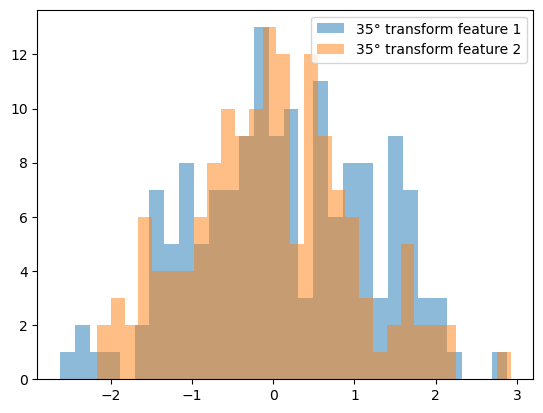

In [4]:
''' 
The Affine2D class is used to create a 2D affine transformation.
The rotate_deg() method is used to rotate the data by 35 degrees.
'''
Z1 = Affine2D().rotate_deg(35).transform(Z0)
print(Z1.shape)

plt.hist(Z1[:, 0], bins=30, alpha=0.5, label='35° transform feature 1')
plt.hist(Z1[:, 1], bins=30, alpha=0.5, label='35° transform feature 2')
plt.legend()
plt.show()

In [5]:
W, V = np.linalg.eig(np.cov(Z1.T))                 # W: eigenvalues, V: eigenvectors
PC1, PC2 = V.T[np.flip(np.argsort(abs(W)))]        # PCs are columns of V, and the 1st one has the highest eigenvalue
if PC2[1] < 0:                                     # to make PC2 "upwards"
    PC2 = -PC2
rotation = 180 * np.arctan2(*np.flip(PC1)) / np.pi # the 1st argument of arctan2 is the y value
T = np.array([PC1[0], PC1[1]])                     # tangent vector of PC1 (a deep copy of PC1)
O = np.array([PC2[0], PC2[1]])                     # orthogonal vector of PC1 (a deep copy of PC2)

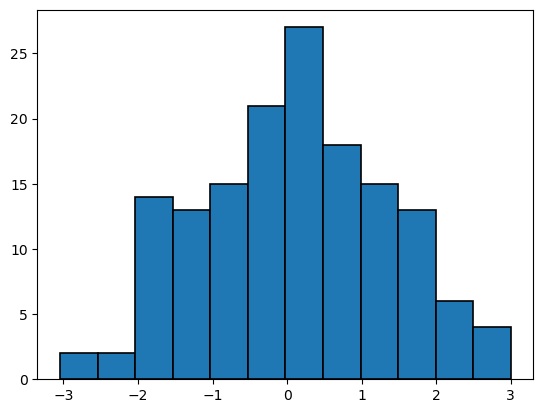

In [6]:
hist_data = np.dot(-Z1 , PC1) * -1
ax2 = plt.hist(hist_data,bins=12,edgecolor='black', linewidth=1.2)

In [7]:
# The @ operator is used to perform matrix multiplication:
np.all(np.dot(-Z1 , PC1) * -1 == (Z1 @ PC1))

True

In [65]:
# The following code calculates the histogram of the data projected onto the orthogonal vector of PC1:

xmin, xmax = -8, 8

counts, bins = np.histogram(-Z1 @ PC1, bins=3)     # histogram of -Z1 orthogonal to PC1 direction with 12 bins
X0 = (bins - bins[0]) / (bins[-1] - bins[0])        # X0 : normalized bins range [0, 1]
X1 = xmin + (xmax - xmin) * X0 
Y = np.array(counts)

In [66]:
np.min(-Z1 @ PC1), np.max(-Z1 @ PC1)

(-3.0022824260196757, 3.0457263385346964)

In [67]:
bins

array([-3.00228243, -0.9862795 ,  1.02972342,  3.04572634])

In [68]:
X0

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [69]:
bins - bins[0], bins[-1] - bins[0] 

(array([0.        , 2.01600292, 4.03200584, 6.04800876]), 6.048008764554372)

In [70]:
xmin , (xmax - xmin)

(-8, 16)

In [71]:
16 * X0

array([ 0.        ,  5.33333333, 10.66666667, 16.        ])

In [72]:
xmin + (16 * X0)

array([-8.        , -2.66666667,  2.66666667,  8.        ])

In [73]:
X1

array([-8.        , -2.66666667,  2.66666667,  8.        ])

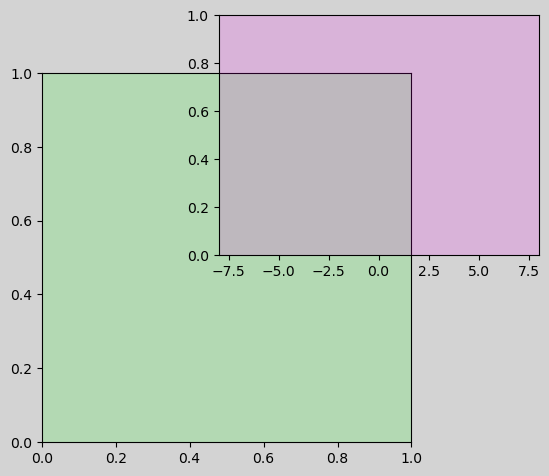

In [74]:
import matplotlib.pyplot as plt



fig = plt.figure()

ax1 = fig.add_subplot(111)  # Main axes



# Add a smaller axes in the top right corner of ax1, relative to its coordinates

ax2 = fig.add_axes([0.5, 0.5, 0.5, 0.5], transform=ax1.transData)


fig.set_facecolor('lightgray')
ax1.set_facecolor((0,1,0,0.15))
ax2.set_facecolor((1,0,1,0.15))
ax2.set_xlim(-8, 8)


ax1.set_aspect('equal')



In [75]:
X1[:-1]

array([-8.        , -2.66666667,  2.66666667])

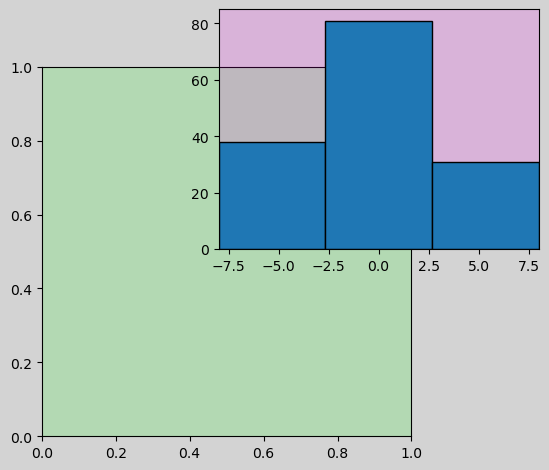

In [76]:

ax2.hist(X1[:-1],
         X1,
         weights=Y,
         facecolor="tab:blue",
         edgecolor="black")

ax2.figure

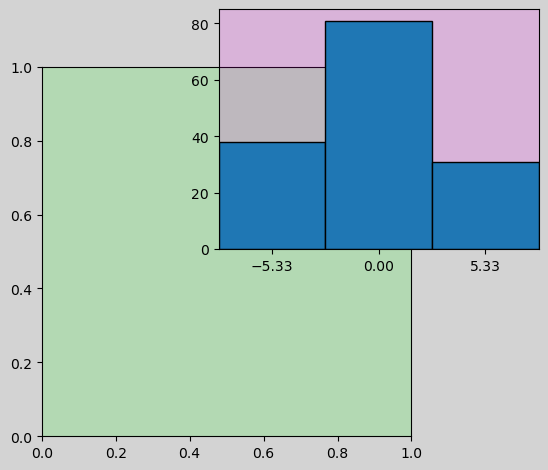

In [77]:
bin_centers = (X1[:-1] + X1[1:]) / 2
ax2.set_xticks(bin_centers)

# Optional: Set x-tick labels to display the center values
#ax2.set_xticklabels([f"{center:.1f}" for center in bin_centers])
ax2.figure